In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

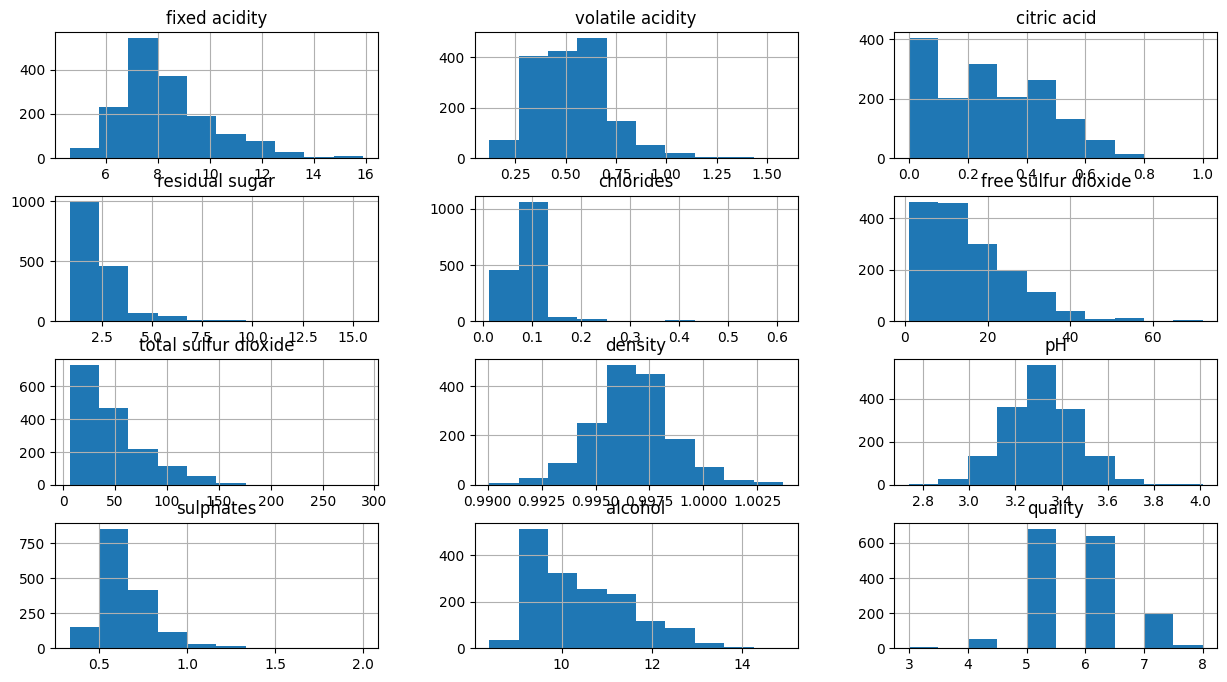

In [45]:
df.hist(figsize=(15,8))

In [56]:
df['residual sugar'] = np.log(df['residual sugar']+1)
df['chlorides'] = np.log(df['chlorides']+1)
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide']+1)
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide']+1)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

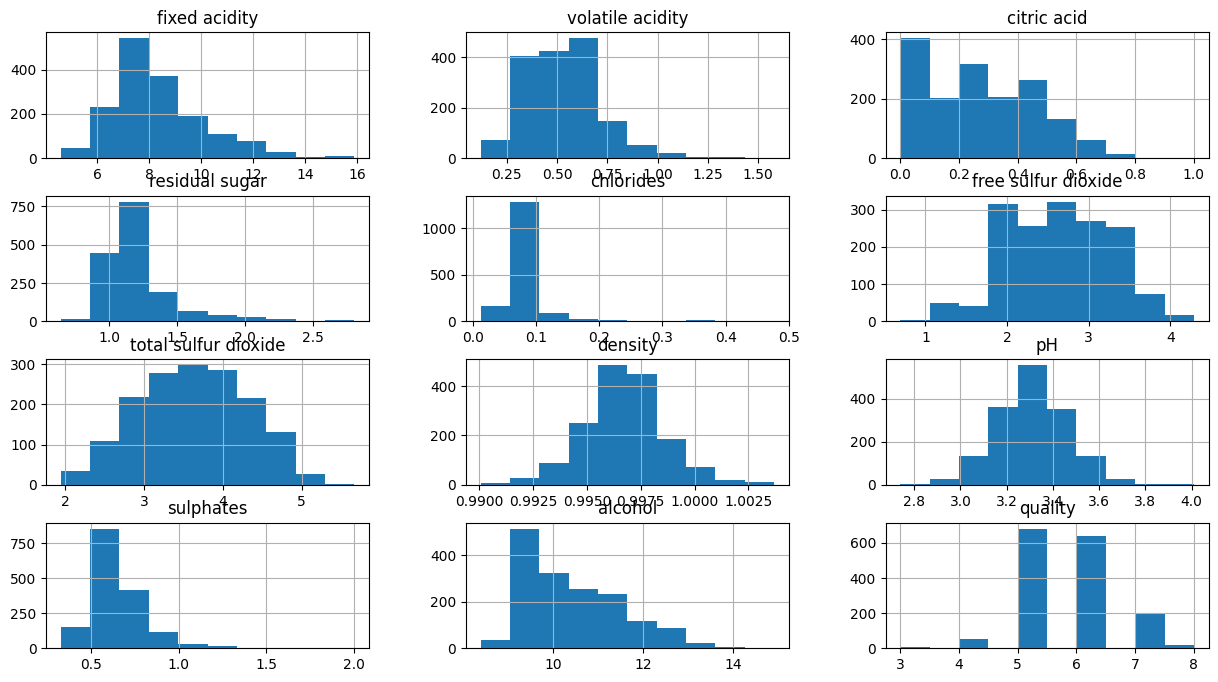

In [57]:
df.hist(figsize=(15,8))

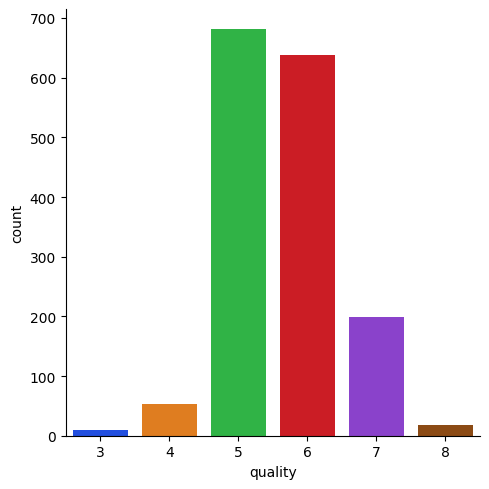

In [83]:
#Checking the number of values for each quality
sns.catplot(x='quality', data=df, kind='count', palette="bright", hue="quality", legend=False)

**Some analysis to see the relation between the values with the actual 'quality'**

<Axes: xlabel='quality', ylabel='volatile acidity'>

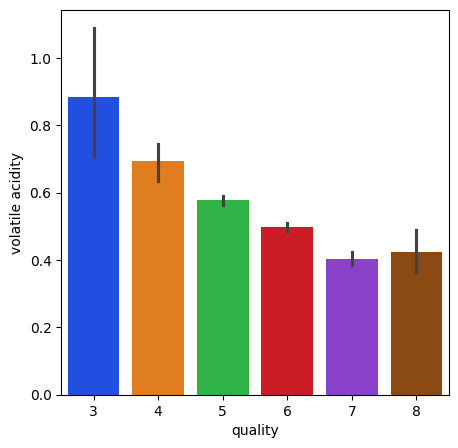

In [59]:
#Quality vs Volatile Acidity
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=df, palette="bright", hue="quality", legend=False)

<Axes: xlabel='quality', ylabel='fixed acidity'>

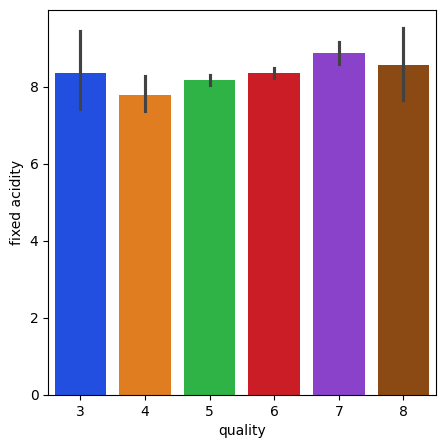

In [60]:
#Quality vs fixed acidity
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='fixed acidity', data=df, palette="bright", hue="quality", legend=False)

<Axes: xlabel='quality', ylabel='citric acid'>

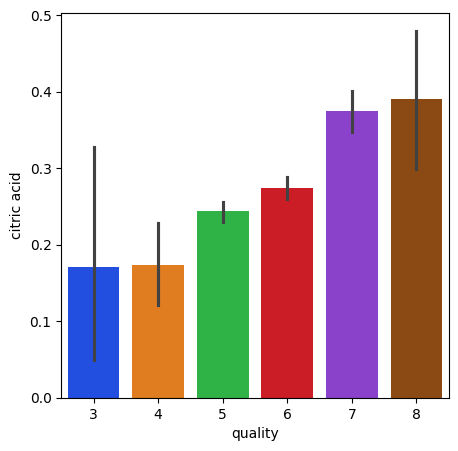

In [61]:
#Quality vs citric acid
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=df, palette="bright", hue="quality", legend=False)

<Axes: >

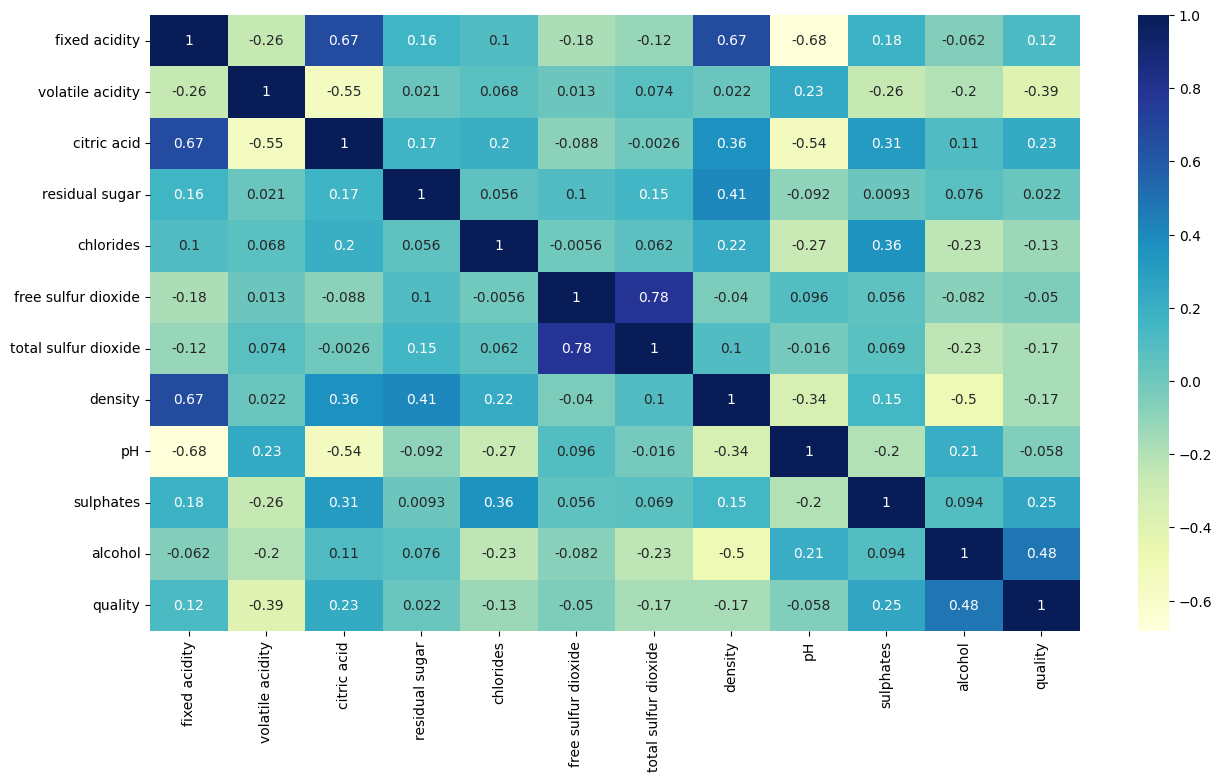

In [62]:
#Constructing a heatmap to better understand the correlation between the columns 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [63]:
from sklearn.model_selection import train_test_split

x = df.drop(['quality'] , axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) #Label_Binarization

In [64]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,1.280934,0.093490,3.258097,4.219508,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,1.193922,0.088011,2.772589,4.007333,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.064711,0.072321,2.890372,4.110874,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.064711,0.073250,2.484907,3.555348,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,1.098612,0.086178,3.496508,3.806662,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,1.163151,0.060154,3.688879,3.951244,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,1.193922,0.073250,3.401197,3.713572,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,1.098612,0.072321,3.496508,3.806662,0.99547,3.57,0.71,10.2


In [65]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [69]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [77]:
reg.score(x_test, y_test)

0.23211049997533473

In [78]:
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23211049997533473

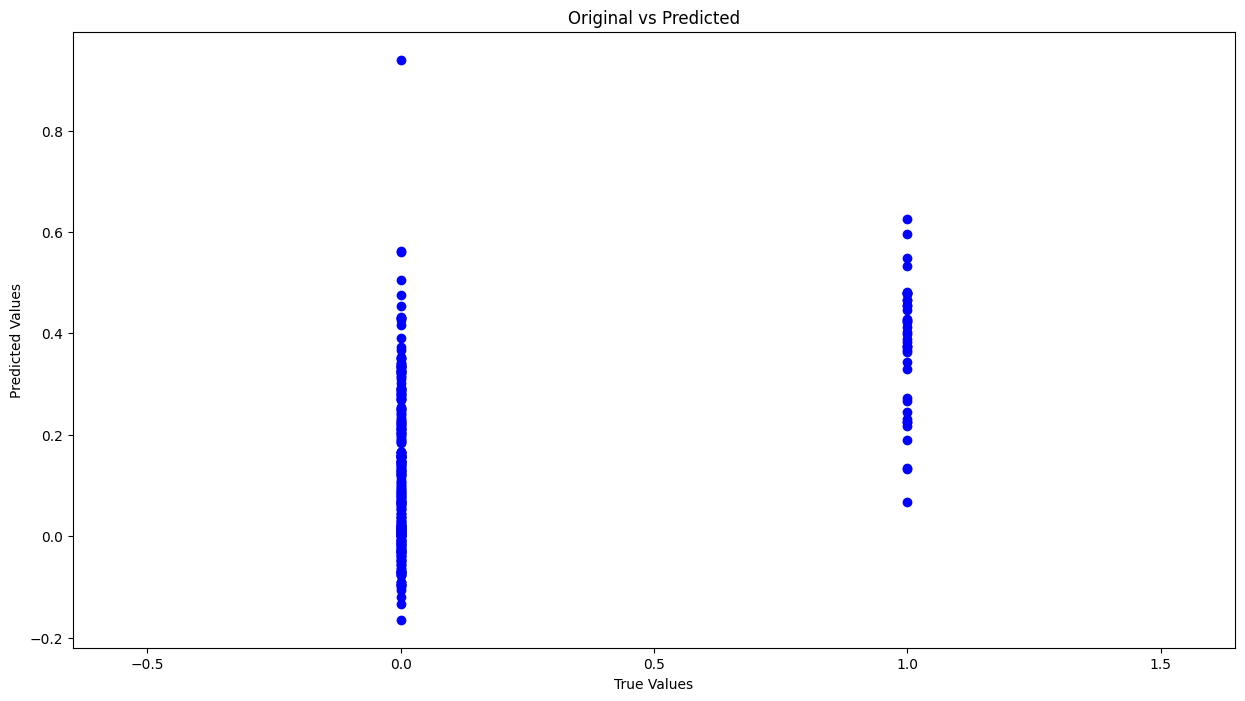

In [81]:
plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred, c=['blue'])
plt.title('Original vs Predicted')
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predicted Values', fontsize=10)
plt.axis('equal')
plt.show()